
# Ordinary Least Squares Regression (Regression mittels der Methode der kleinsten Quadrate)

1. Methode der kleinsten Quadrate (OLS):
   Wir zeigen, wie das Modell der kleinsten Quadrate (OLS),
   :class:`~sklearn.linear_model.LinearRegression`, auf ein einzelnes Merkmal
   des Diabetes-Datensatzes angewendet wird. Wir trainieren auf einem Teil
   der Daten, bewerten auf einem Testdatensatz und visualisieren die Vorhersagen.

In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

## Daten Laden und Vorbereiten

Laden des Diabetes-Datensatzes. Zur Vereinfachung behalten wir nur ein einzelnes Merkmal in den Daten.
Anschließend teilen wir die Daten und das Ziel in Trainings- und Testdaten auf.

In [46]:
from sklearn.datasets import load_diabetes, load_linnerud
from sklearn.model_selection import train_test_split

#X, y = load_diabetes(return_X_y=True)
X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

## Lineares Regressionsmodell

Wir erstellen ein lineares Regressionsmodell und passen es auf die Trainingsdaten an.



In [50]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

## Modellbewertung

Wir bewerten die Leistung des Modells auf dem Testdatensatz anhand des mittleren quadratischen Fehlers
und des Bestimmtheitsmaßes (R²). 

Der R²-Wert (Bestimmtheitsmaß) gibt an, wie gut die Vorhersagen des Modells die tatsächlichen Werte erklären. Ein R² von 1 bedeutet perfekte Vorhersage, ein R² von 0 bedeutet, dass das Modell nicht besser ist als der Mittelwert der Zielvariable. Negative Werte zeigen, dass das Modell schlechter ist als eine naive Schätzung.

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 3203.71
Coefficient of determination: 0.42


## Darstellung der Ergebnisse

Abschließend visualisieren wir die Ergebnisse auf den Trainings- und Testdaten.



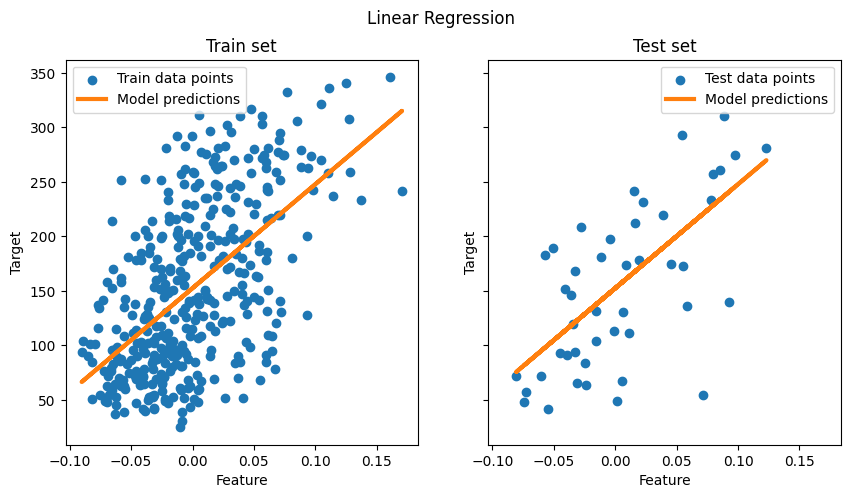

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

OLS auf diesem eindimensionalen Datenausschnitt lernt eine lineare Funktion, die den mittleren quadratischen Fehler auf den Trainingsdaten minimiert. Wie gut (oder schlecht) das Modell generalisiert, sehen wir am R²-Wert und am mittleren quadratischen Fehler auf dem Testdatensatz. In höheren Dimensionen neigt reines OLS oft zum Overfitting, besonders bei verrauschten Daten. Regularisierungstechniken (wie Ridge oder Lasso) können helfen, dies zu reduzieren.



## Übung

- Ersetze den LinearRegressor mit dem SGDRegressor (Stochastic Gradient Decent Regressor) und vergleiche die Ergebnisse
- Gib den Regessor folgende Einstellung mit SGDRegressor(tol=None) und vergleiche die Ergebnisse. 
- Für was steht „tol“?
- Was kannst du für Vor- und Nachteile der jeweiligen Verfahren ableiten?